In [1]:
import pandas as pd


In [2]:
import json


In [3]:
import datetime

In [4]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [5]:
import requests

In [6]:
pd.set_option('display.max_columns', 50)


In [7]:
BASE_URL = 'http://api.weatherapi.com/v1/'
KEY = '84d8637ac63a4f63a4463056221007'
CITY = 'London'
DATE = '2022-07-10'
history_url = BASE_URL + 'history.json' + '?key=' + KEY + '&q='+ CITY + '&dt='+ DATE

In [8]:
response = requests.get(history_url).json()

In [9]:
response.keys()

dict_keys(['location', 'forecast'])

In [10]:
location_df = pd.json_normalize(response['location'])

In [11]:
location_df

,name,region,country,lat,lon,tz_id,localtime_epoch,localtime
0,London,"City of London, Greater London",United Kingdom,51.52,-0.11,Europe/London,1657695158,2022-07-13 7:52


In [12]:
type(location_df)

pandas.core.frame.DataFrame

In [13]:
weather_df = pd.json_normalize(response['forecast']['forecastday'])

In [14]:
weather_df

,date,date_epoch,hour,day.maxtemp_c,day.maxtemp_f,day.mintemp_c,day.mintemp_f,day.avgtemp_c,day.avgtemp_f,day.maxwind_mph,day.maxwind_kph,day.totalprecip_mm,day.totalprecip_in,day.avgvis_km,day.avgvis_miles,day.avghumidity,day.condition.text,day.condition.icon,day.condition.code,day.uv,astro.sunrise,astro.sunset,astro.moonrise,astro.moonset,astro.moon_phase,astro.moon_illumination
0,2022-07-10,1657411200,"[{'time_epoch': 1657407600, 'time': '2022-07-1...",29.5,85.1,15.4,59.7,25.1,77.2,7.4,11.9,0.0,0.0,10.0,6.0,50.0,Partly cloudy,//cdn.weatherapi.com/weather/64x64/day/116.png,1003,0.0,04:55 AM,09:16 PM,06:04 PM,01:34 AM,Waxing Gibbous,76


In [15]:
weather_df.columns = weather_df.columns.map(lambda x: x.split('.')[-1])

In [16]:
del weather_df['hour']

In [17]:
del weather_df['icon']

In [18]:
weather_df

,date,date_epoch,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,avgtemp_f,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,text,code,uv,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,2022-07-10,1657411200,29.5,85.1,15.4,59.7,25.1,77.2,7.4,11.9,0.0,0.0,10.0,6.0,50.0,Partly cloudy,1003,0.0,04:55 AM,09:16 PM,06:04 PM,01:34 AM,Waxing Gibbous,76


In [19]:
del weather_df['maxwind_kph']

In [20]:
weather_df

,date,date_epoch,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,avgtemp_f,maxwind_mph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,text,code,uv,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,2022-07-10,1657411200,29.5,85.1,15.4,59.7,25.1,77.2,7.4,0.0,0.0,10.0,6.0,50.0,Partly cloudy,1003,0.0,04:55 AM,09:16 PM,06:04 PM,01:34 AM,Waxing Gibbous,76


In [21]:
location_df


,name,region,country,lat,lon,tz_id,localtime_epoch,localtime
0,London,"City of London, Greater London",United Kingdom,51.52,-0.11,Europe/London,1657695158,2022-07-13 7:52


In [22]:
del location_df['localtime']

In [23]:
location_df

,name,region,country,lat,lon,tz_id,localtime_epoch
0,London,"City of London, Greater London",United Kingdom,51.52,-0.11,Europe/London,1657695158


In [24]:
df = pd.concat([location_df, weather_df], axis=1)

In [25]:
df

,name,region,country,lat,lon,tz_id,localtime_epoch,date,date_epoch,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,avgtemp_f,maxwind_mph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,text,code,uv,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,London,"City of London, Greater London",United Kingdom,51.52,-0.11,Europe/London,1657695158,2022-07-10,1657411200,29.5,85.1,15.4,59.7,25.1,77.2,7.4,0.0,0.0,10.0,6.0,50.0,Partly cloudy,1003,0.0,04:55 AM,09:16 PM,06:04 PM,01:34 AM,Waxing Gibbous,76


In [26]:
ua_cities = pd.read_csv('ua.csv')

In [27]:
ua_cities

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Kyiv,50.4500,30.5236,Ukraine,UA,"Kyyiv, Misto",primary,2963199.0,2963199.0
1,Kharkiv,50.0000,36.2292,Ukraine,UA,Kharkivs’ka Oblast’,admin,1446107.0,1446107.0
2,Odesa,46.4775,30.7326,Ukraine,UA,Odes’ka Oblast’,admin,1017699.0,1017699.0
3,Dnipro,48.4500,34.9833,Ukraine,UA,Dnipropetrovs’ka Oblast’,admin,1002111.0,1002111.0
4,Donetsk,48.0089,37.8042,Ukraine,UA,Donets’ka Oblast’,admin,929063.0,929063.0
...,...,...,...,...,...,...,...,...,...
1464,Kazanka,47.8381,32.8261,Ukraine,UA,Mykolayivs’ka Oblast’,minor,NaN,NaN
1465,Mykolaivka,47.5389,30.7528,Ukraine,UA,Odes’ka Oblast’,minor,NaN,NaN
1466,Milove,49.3778,40.1306,Ukraine,UA,Luhans’ka Oblast’,minor,NaN,NaN
1467,Nyzhni Sirohozy,46.8395,34.3760,Ukraine,UA,Khersons’ka Oblast’,minor,NaN,NaN


In [28]:
filt = ua_cities['population'] > 200000

In [29]:
ua_cities = ua_cities.loc[filt]

In [30]:
major_cities = ua_cities['city'].tolist()

In [112]:
major_cities[11] = 'Vinnytsya'
major_cities


['Kiev',
 'Kharkiv',
 'Odesa',
 'Dnipropetrovsk',
 'Donetsk',
 'Zaporozh’Ye',
 'Lviv',
 'Kryvyy Rih',
 'Mariupol',
 'Sevastopol',
 'Luhansk',
 'Vinnytsya',
 'Poltava',
 'Chernihiv',
 'Kherson',
 'Cherkasy',
 'Zhytomyr',
 'Chernivtsi',
 'Sumy',
 'Horlivka',
 'Rivne',
 'Kremenchuk',
 'Ternopil',
 'Bila Tserkva']

In [191]:
import datetime as dt
from datetime import timedelta

history_url = BASE_URL + 'history.json' + '?key=' + KEY + '&q=Konotop' + '&dt=' + DATE
response = requests.get(history_url).json()
w_df=pd.json_normalize(response, record_path=['forecast', 'forecastday'])
geo_df=pd.json_normalize(response['location'])
w_df.columns = w_df.columns.map(lambda x: x.split('.')[-1])
w_df.drop(['icon', 'hour', 'maxtemp_f', 'mintemp_f', 'avgtemp_f', 'totalprecip_in', 'avgvis_miles', 'maxwind_kph'], axis=1, inplace=True)
geo_df.drop(['region', "localtime_epoch", "localtime"], axis=1, inplace=True)
ua_df = pd.concat([geo_df, w_df], axis=1)

for city in major_cities:
    today_date = dt.date.today()
    start_date = today_date - timedelta(days=7)
    while start_date != today_date:
        DATE = str(start_date)
        history_url = BASE_URL + 'history.json' + '?key=' + KEY + '&q=' + city + '&dt='+ DATE
        response = requests.get(history_url).json()
        w_df=pd.json_normalize(response['forecast']['forecastday'])
        geo_df=pd.json_normalize(response['location'])
        w_df.columns = w_df.columns.map(lambda x: x.split('.')[-1])
        w_df.drop(['icon', 'hour', 'maxtemp_f', 'mintemp_f', 'avgtemp_f', 'totalprecip_in', 'avgvis_miles', 'maxwind_kph'], axis=1, inplace=True)
        geo_df.drop(['region', "localtime_epoch", "localtime"], axis=1, inplace=True)
        city_df = pd.concat([geo_df, w_df], axis=1)
        ua_df=pd.concat([ua_df, city_df], axis=0)
        start_date += timedelta(days=1)

    
  

In [204]:
ua_df.rename(columns={'name':'city', 'text': 'day_description'}, inplace=True)

In [236]:
ua_df

,city,country,lat,lon,tz_id,date,date_epoch,maxtemp_c,mintemp_c,avgtemp_c,maxwind_mph,totalprecip_mm,avgvis_km,avghumidity,day_description,code,uv,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Konotop,Ukraine,51.23,33.20,Europe/Kiev,2022-07-12,1657584000,21.7,12.8,19.2,14.5,0.0,9.9,65.0,Partly cloudy,1003,0.0,04:45 AM,09:00 PM,08:27 PM,02:30 AM,Waxing Gibbous,90
0,Kiev,Ukraine,50.43,30.52,Europe/Kiev,2022-07-06,1657065600,33.7,18.4,28.4,13.6,0.4,9.9,57.0,Patchy rain possible,1063,0.0,04:54 AM,09:11 PM,12:23 PM,12:25 AM,Waxing Crescent,49
0,Kiev,Ukraine,50.43,30.52,Europe/Kiev,2022-07-07,1657152000,23.4,15.5,20.9,10.5,0.2,10.0,71.0,Overcast,1009,0.0,04:55 AM,09:10 PM,01:39 PM,12:39 AM,First Quarter,56
0,Kiev,Ukraine,50.43,30.52,Europe/Kiev,2022-07-08,1657238400,28.1,15.7,24.1,8.9,0.5,9.5,62.0,Thundery outbreaks possible,1087,0.0,04:56 AM,09:10 PM,02:58 PM,12:54 AM,First Quarter,63
0,Kiev,Ukraine,50.43,30.52,Europe/Kiev,2022-07-09,1657324800,24.9,17.7,21.6,12.3,0.1,10.0,60.0,Cloudy,1006,0.0,04:57 AM,09:09 PM,04:21 PM,01:11 AM,First Quarter,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Bila Tserkva,Ukraine,49.78,30.12,Europe/Kiev,2022-07-08,1657238400,28.4,13.1,24.1,12.1,3.1,9.3,65.0,Thundery outbreaks possible,1087,0.0,05:01 AM,09:08 PM,02:58 PM,12:56 AM,First Quarter,63
0,Bila Tserkva,Ukraine,49.78,30.12,Europe/Kiev,2022-07-09,1657324800,25.7,15.6,22.8,15.4,0.4,9.4,62.0,Partly cloudy,1003,0.0,05:02 AM,09:07 PM,04:21 PM,01:15 AM,First Quarter,69
0,Bila Tserkva,Ukraine,49.78,30.12,Europe/Kiev,2022-07-10,1657411200,25.2,13.4,21.2,9.8,0.0,10.0,64.0,Cloudy,1006,0.0,05:03 AM,09:07 PM,05:47 PM,01:37 AM,Waxing Gibbous,76
0,Bila Tserkva,Ukraine,49.78,30.12,Europe/Kiev,2022-07-11,1657497600,20.9,13.5,18.9,15.2,0.5,10.0,63.0,Light rain shower,1240,0.0,05:04 AM,09:06 PM,07:13 PM,02:08 AM,Waxing Gibbous,83


In [241]:
index = pd.Index(range(1, 170))
ua_df.set_index(index, inplace=True)
ua_df

,city,country,lat,lon,tz_id,date,date_epoch,maxtemp_c,mintemp_c,avgtemp_c,maxwind_mph,totalprecip_mm,avgvis_km,avghumidity,day_description,code,uv,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
1,Konotop,Ukraine,51.23,33.20,Europe/Kiev,2022-07-12,1657584000,21.7,12.8,19.2,14.5,0.0,9.9,65.0,Partly cloudy,1003,0.0,04:45 AM,09:00 PM,08:27 PM,02:30 AM,Waxing Gibbous,90
2,Kiev,Ukraine,50.43,30.52,Europe/Kiev,2022-07-06,1657065600,33.7,18.4,28.4,13.6,0.4,9.9,57.0,Patchy rain possible,1063,0.0,04:54 AM,09:11 PM,12:23 PM,12:25 AM,Waxing Crescent,49
3,Kiev,Ukraine,50.43,30.52,Europe/Kiev,2022-07-07,1657152000,23.4,15.5,20.9,10.5,0.2,10.0,71.0,Overcast,1009,0.0,04:55 AM,09:10 PM,01:39 PM,12:39 AM,First Quarter,56
4,Kiev,Ukraine,50.43,30.52,Europe/Kiev,2022-07-08,1657238400,28.1,15.7,24.1,8.9,0.5,9.5,62.0,Thundery outbreaks possible,1087,0.0,04:56 AM,09:10 PM,02:58 PM,12:54 AM,First Quarter,63
5,Kiev,Ukraine,50.43,30.52,Europe/Kiev,2022-07-09,1657324800,24.9,17.7,21.6,12.3,0.1,10.0,60.0,Cloudy,1006,0.0,04:57 AM,09:09 PM,04:21 PM,01:11 AM,First Quarter,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Bila Tserkva,Ukraine,49.78,30.12,Europe/Kiev,2022-07-08,1657238400,28.4,13.1,24.1,12.1,3.1,9.3,65.0,Thundery outbreaks possible,1087,0.0,05:01 AM,09:08 PM,02:58 PM,12:56 AM,First Quarter,63
166,Bila Tserkva,Ukraine,49.78,30.12,Europe/Kiev,2022-07-09,1657324800,25.7,15.6,22.8,15.4,0.4,9.4,62.0,Partly cloudy,1003,0.0,05:02 AM,09:07 PM,04:21 PM,01:15 AM,First Quarter,69
167,Bila Tserkva,Ukraine,49.78,30.12,Europe/Kiev,2022-07-10,1657411200,25.2,13.4,21.2,9.8,0.0,10.0,64.0,Cloudy,1006,0.0,05:03 AM,09:07 PM,05:47 PM,01:37 AM,Waxing Gibbous,76
168,Bila Tserkva,Ukraine,49.78,30.12,Europe/Kiev,2022-07-11,1657497600,20.9,13.5,18.9,15.2,0.5,10.0,63.0,Light rain shower,1240,0.0,05:04 AM,09:06 PM,07:13 PM,02:08 AM,Waxing Gibbous,83


In [237]:
day_grp = ua_df.groupby(['date'])

In [253]:
sat = day_grp.get_group('2022-07-09')
sat[['city', 'avgtemp_c']]
cities = sat['city']
min_sat_t = sat['mintemp_c']
max_sat_t = sat['maxtemp_c']


5                Kiev
12            Kharkiv
19              Odesa
26     Dnipropetrovsk
33            Donetsk
40        Zaporozh’Ye
47               Lviv
54         Kryvyy Rih
61           Mariupol
68         Sevastopol
75            Luhansk
82          Vinnytsya
89            Poltava
96          Chernihiv
103           Kherson
110          Cherkasy
117          Zhytomyr
124        Chernivtsi
131              Sumy
138          Horlivka
145             Rivne
152        Kremenchuk
159          Ternopil
166      Bila Tserkva
Name: city, dtype: object

In [220]:
from matplotlib import pyplot as plt

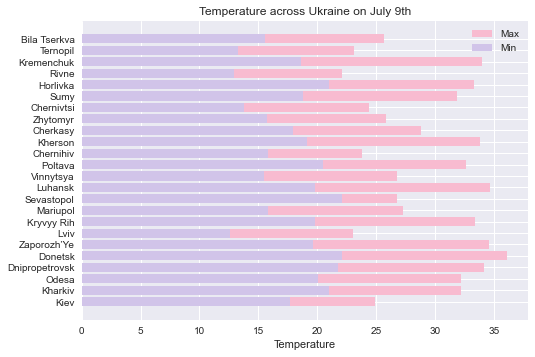

In [288]:
plt.style.use('seaborn')
plt.title('Temperature across Ukraine on July 9th')
plt.xlabel('Temperature')
plt.barh(cities, max_sat_t, color='#F8BBD0', label='Max')
plt.barh(cities, min_sat_t, color='#D1C4E9', label='Min')
plt.legend()
plt.savefig('09June.png')

In [271]:
cities_grp = ua_df.groupby(['city'])

In [279]:
kyiv = cities_grp.get_group('Kiev')

In [278]:
ua_df['lat'].unique()

array([51.23, 50.43, 50.  , 46.47, 48.45, 48.34, 47.82, 49.83, 47.92,
       54.2 , 44.6 , 48.57, 49.23, 49.58, 51.5 , 46.63, 49.43, 50.25,
       48.3 , 50.92, 50.62, 49.07, 49.55, 49.78])

In [337]:
k_min = kyiv['mintemp_c']
k_max = kyiv['maxtemp_c']
k_avg = kyiv['avgtemp_c']
dates = kyiv['date']
kyiv
from datetime import datetime
week_days = []
for day in dates:
    ddt_obj = datetime.strptime(day, '%Y-%m-%d')
    weekday = ddt_obj.strftime('%A')
    week_days.append(weekday)
week_days

['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday']

In [285]:
k_min, k_max

(2    18.4
 3    15.5
 4    15.7
 5    17.7
 6    15.3
 7    14.9
 8    11.9
 Name: mintemp_c, dtype: float64,
 2    33.7
 3    23.4
 4    28.1
 5    24.9
 6    24.1
 7    22.4
 8    22.8
 Name: maxtemp_c, dtype: float64)

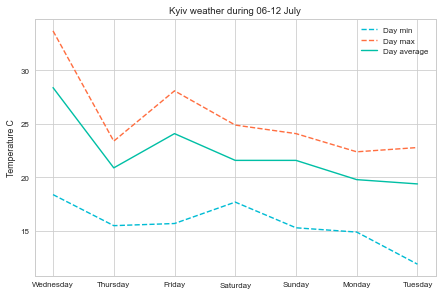

In [340]:
plt.style.use('seaborn-whitegrid')
plt.title('Kyiv weather during 06-12 July')
plt.ylabel('Temperature C')
plt.plot(week_days, k_min, color='#00BCD4', linestyle='--', label='Day min')
plt.plot(week_days, k_max, color='#FF6E40', linestyle='--', label='Day max')
plt.plot(week_days, k_avg, color='#00BFA5', label='Day average')
plt.legend()
plt.savefig('kyiv_weather.png')

In [298]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [344]:
ua_cities.shape

(32, 9)

In [345]:
ua_cities = pd.read_csv('ua.csv')

In [349]:
ua_cities

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Kyiv,50.4500,30.5236,Ukraine,UA,"Kyyiv, Misto",primary,2963199.0,2963199.0
1,Kharkiv,50.0000,36.2292,Ukraine,UA,Kharkivs’ka Oblast’,admin,1446107.0,1446107.0
2,Odesa,46.4775,30.7326,Ukraine,UA,Odes’ka Oblast’,admin,1017699.0,1017699.0
3,Dnipro,48.4500,34.9833,Ukraine,UA,Dnipropetrovs’ka Oblast’,admin,1002111.0,1002111.0
4,Donetsk,48.0089,37.8042,Ukraine,UA,Donets’ka Oblast’,admin,929063.0,929063.0
...,...,...,...,...,...,...,...,...,...
1464,Kazanka,47.8381,32.8261,Ukraine,UA,Mykolayivs’ka Oblast’,minor,NaN,NaN
1465,Mykolaivka,47.5389,30.7528,Ukraine,UA,Odes’ka Oblast’,minor,NaN,NaN
1466,Milove,49.3778,40.1306,Ukraine,UA,Luhans’ka Oblast’,minor,NaN,NaN
1467,Nyzhni Sirohozy,46.8395,34.3760,Ukraine,UA,Khersons’ka Oblast’,minor,NaN,NaN


In [ ]:
##filling all missing values in population by the previous ones since
## the order is descenting


In [ ]:
###grouping by regions, for every region summing up population column

In [361]:
ua_cities['population'].fillna(method='pad', inplace=True)

In [362]:
ua_cities

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Kyiv,50.4500,30.5236,Ukraine,UA,"Kyyiv, Misto",primary,2963199.0,2963199.0
1,Kharkiv,50.0000,36.2292,Ukraine,UA,Kharkivs’ka Oblast’,admin,1446107.0,1446107.0
2,Odesa,46.4775,30.7326,Ukraine,UA,Odes’ka Oblast’,admin,1017699.0,1017699.0
3,Dnipro,48.4500,34.9833,Ukraine,UA,Dnipropetrovs’ka Oblast’,admin,1002111.0,1002111.0
4,Donetsk,48.0089,37.8042,Ukraine,UA,Donets’ka Oblast’,admin,929063.0,929063.0
...,...,...,...,...,...,...,...,...,...
1464,Kazanka,47.8381,32.8261,Ukraine,UA,Mykolayivs’ka Oblast’,minor,1002.0,NaN
1465,Mykolaivka,47.5389,30.7528,Ukraine,UA,Odes’ka Oblast’,minor,1002.0,NaN
1466,Milove,49.3778,40.1306,Ukraine,UA,Luhans’ka Oblast’,minor,1002.0,NaN
1467,Nyzhni Sirohozy,46.8395,34.3760,Ukraine,UA,Khersons’ka Oblast’,minor,1002.0,NaN


In [381]:
oblast_grp = ua_cities.groupby(['admin_name'])
oblast_list = ua_cities['admin_name'].unique()
ppl_in_region = []
for oblast in oblast_list:
    obl = oblast_grp.get_group(oblast)
    oblast_population = obl['population'].sum()
    ppl_in_region.append(oblast_population)
ppl_in_region

[2983297.0,
 1817870.0,
 1496790.0,
 2878628.0,
 3170213.0,
 1365856.0,
 1418304.0,
 605901.0,
 442778.0,
 1691846.0,
 918310.0,
 816224.0,
 853221.0,
 606576.0,
 535882.0,
 673399.0,
 574146.0,
 728892.0,
 365200.0,
 668440.0,
 377024.0,
 677052.0,
 408132.0,
 352441.0,
 569733.0,
 1162910.0,
 622704.0]

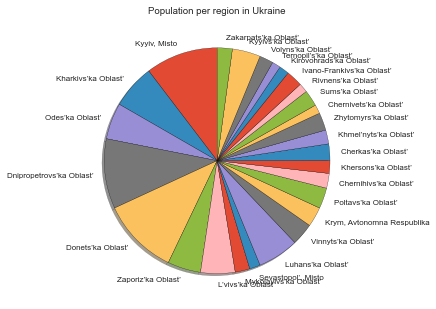

In [391]:
plt.pie(ppl_in_region, labels=oblast_list, shadow=True, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Population per region in Ukraine")
plt.tight_layout()
plt.savefig('ppl_pie.png')

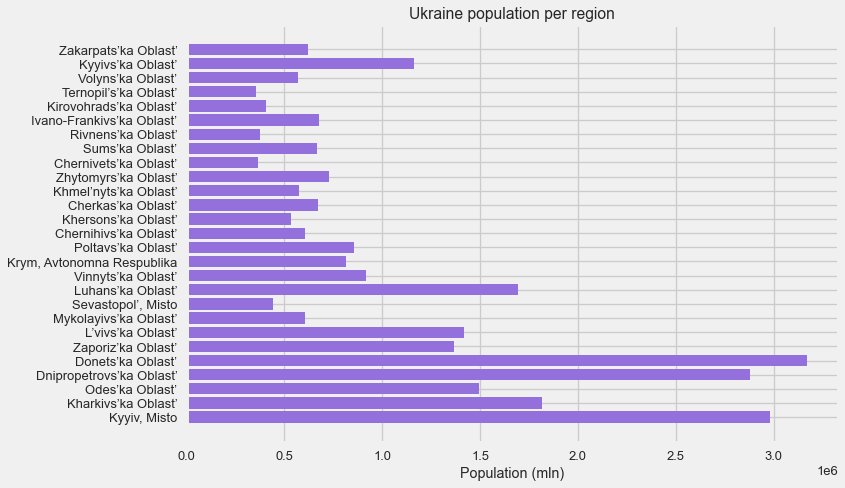

In [405]:
plt.style.use('seaborn-talk')
plt.title('Ukraine population per region')
plt.xlabel('Population (mln)')
plt.barh(oblast_list, ppl_in_region, color='#9370DB')
plt.savefig('population_bar.png')

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']